<a href="https://colab.research.google.com/github/MananPoojara/CV-Labwork/blob/main/pr5CV_Harris_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload 4 images...


Saving 20250220_162659.jpg to 20250220_162659.jpg
Saving 20250221_074300.jpg to 20250221_074300.jpg
Saving 20250222_093052.jpg to 20250222_093052.jpg
Saving 20250222_175343.jpg to 20250222_175343.jpg
Saving 20250222_180324.jpg to 20250222_180324.jpg


<ipython-input-3-996ddb19e073>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  input_img = imageio.imread(img_path)


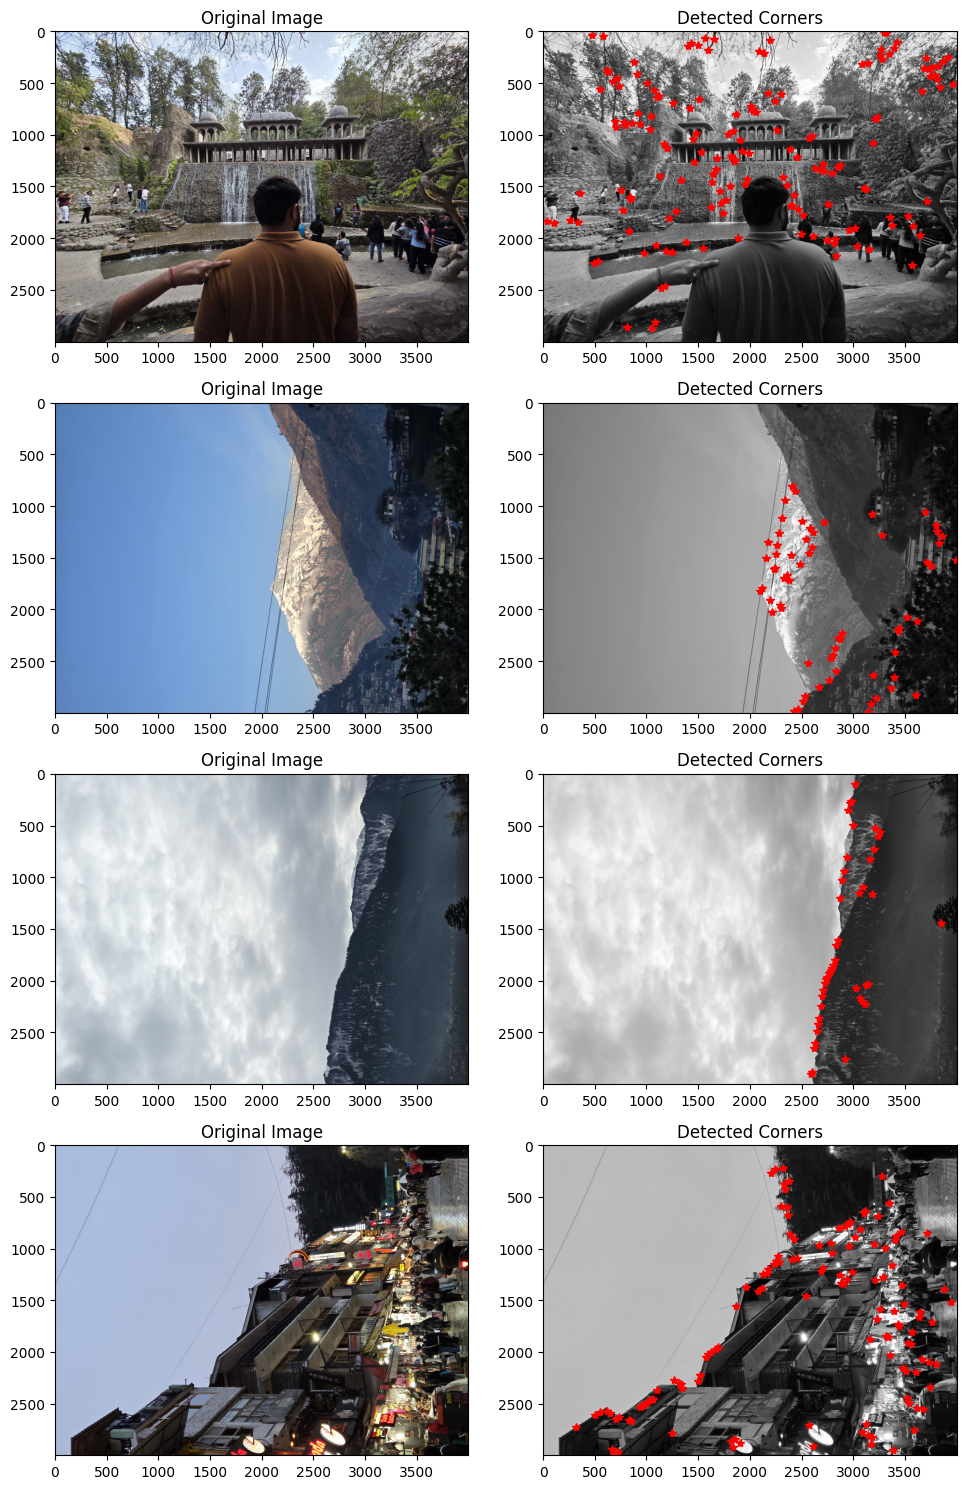

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import ndimage
from google.colab import files

# Upload 4 images
print("Upload 4 images...")
uploaded = files.upload()
img_paths = list(uploaded.keys())[:4]  # Ensure only 4 images are selected

def rgb2gray(img):
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

def gradient_x(img):
    return ndimage.convolve(img, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])) / np.max(img)

def gradient_y(img):
    return ndimage.convolve(img, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])) / np.max(img)

# Process and Display Images
fig, axes = plt.subplots(len(img_paths), 2, figsize=(10, 15))
k = 0.04  # Harris detector constant
thres_ratio = 0.05  # Threshold ratio

for img_idx, img_path in enumerate(img_paths): # Changed loop variable to img_idx
    input_img = imageio.imread(img_path)
    gray_input_img = rgb2gray(input_img)
    blur_img = ndimage.gaussian_filter(gray_input_img, sigma=1.0)
    x_grad, y_grad = gradient_x(blur_img), gradient_y(blur_img)

    xx_grad, yy_grad, xy_grad = x_grad * x_grad, y_grad * y_grad, x_grad * y_grad
    tuple_data = []
    max_response = 0

    for i in range(1, input_img.shape[0] - 1):
        for j in range(1, input_img.shape[1] - 1):
            window_x = xx_grad[i-4 : i+5 , j-4 : j+5]
            window_y = yy_grad[i-4 : i+5 , j-4 : j+5]
            window_xy = xy_grad[i-4 : i+5 , j-4 : j+5]
            sum_xx, sum_yy, sum_xy = np.sum(window_x), np.sum(window_y), np.sum(window_xy)
            determinant, trace = (sum_xx * sum_yy) - (sum_xy ** 2), sum_xx + sum_yy
            R = determinant - (k * trace ** 2)
            tuple_data.append((i, j, R))
            if R > max_response:
                max_response = R

    threshold = thres_ratio * max_response
    L = [(i, j, R) for i, j, R in tuple_data if R > threshold]
    sorted_L = sorted(L, key=lambda x: x[2], reverse=True)

    final_L, xc, yc = [sorted_L[0][:-1]], [], []
    for i in sorted_L:
        if all(abs(i[0] - j[0]) > 10 and abs(i[1] - j[1]) > 10 for j in final_L):
            final_L.append(i[:-1])
            xc.append(i[1])
            yc.append(i[0])

    axes[img_idx, 0].imshow(input_img, cmap='gray') # Using img_idx to index axes
    axes[img_idx, 0].set_title("Original Image")

    axes[img_idx, 1].imshow(gray_input_img, cmap='gray') # Using img_idx to index axes
    axes[img_idx, 1].plot(xc, yc, '*', color='red')
    axes[img_idx, 1].set_title("Detected Corners")

plt.tight_layout()
plt.show()